In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [2]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [4]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=10, activation="softmax"))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [7]:
train_X= train_X.reshape(-1,28,28,1)

In [8]:
# train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
# test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [9]:
train_y.shape

(48000, 10)

In [10]:
hist=[]
results=[]

In [11]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01),Adam(lr=0.001)]
epochs_list = [5,10,15]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
       validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
750/750 [==============================] - 34s 31ms/step - loss: 0.7141 - accuracy: 0.7680 - val_loss: 0.1067 - val_accuracy: 0.9656
Epoch 2/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 3/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0533 - accuracy: 0.9840 - val_loss: 0.0581 - val_accuracy: 0.9815
Epoch 4/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0503 - val_accuracy: 0.9838
Epoch 5/5
79/79 [==============================] - 2s 17ms/step - loss: 0.0342 - accuracy: 0.9893
Epoch 1/10
750/750 [==============================] - 24s 31ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0596 - val_accuracy: 0.9847
Epoch 2/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0399 - val_accuracy: 0.9893
Epoch 3/10
750/750 [======================

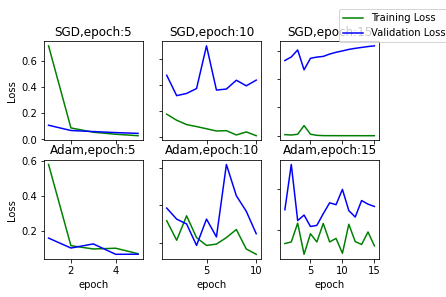

In [12]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)


axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:15')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:15')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

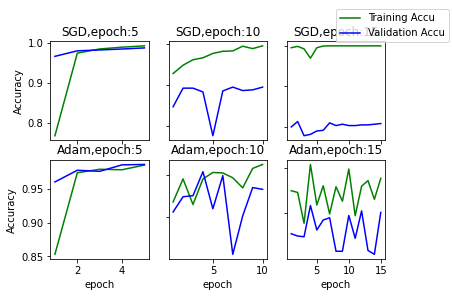

In [13]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)
axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:15')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:15')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [14]:
results

[[0.034243393689394, 0.989300012588501],
 [0.037184469401836395, 0.991100013256073],
 [0.039036087691783905, 0.9916999936103821],
 [0.04478760063648224, 0.9896000027656555],
 [0.049577269703149796, 0.9883000254631042],
 [0.051326118409633636, 0.9908000230789185]]